## 1. Setup & Data Loading

In [1]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Add the project root to path for module imports
import sys
sys.path.append('..')

# Import project modules
from src.config import OUTPUT_DIR, SENTIMENT_CATEGORIES
from src.data_loader import load_historical_data, load_fear_greed_index, merge_datasets
from src.analysis import (
    calculate_trading_metrics, 
    analyze_sentiment_performance, 
    calculate_sentiment_transition_matrix,
    calculate_performance_by_account,
    analyze_side_by_sentiment,
    calculate_sentiment_correlation
)
from src.visualization import (
    set_plotting_style,
    plot_sentiment_distribution,
    plot_profit_by_sentiment,
    plot_win_rate_by_sentiment,
    plot_sentiment_value_time_series,
    plot_trade_size_vs_sentiment,
    plot_heatmap_correlation,
    plot_trading_volume_by_sentiment
)

# Set plot style
set_plotting_style()


In [2]:
# Load datasets
historical_data = load_historical_data()
sentiment_data = load_fear_greed_index()
merged_data = merge_datasets()

# Create output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)


## 2. Exploratory Data Analysis

In [3]:
# Basic information about the datasets
print(f"Historical Trading Data: {len(historical_data)} records")
print(f"Sentiment Data: {len(sentiment_data)} records")
print(f"Merged Dataset: {len(merged_data)} records")


Historical Trading Data: 211224 records
Sentiment Data: 2644 records
Merged Dataset: 211224 records


In [4]:
historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Profit_Factor
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1


In [5]:
sentiment_data.head()

,timestamp,value,classification,date,datetime,Date
0,1517463000,30,Fear,2018-02-01,2018-02-01 05:30:00,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02 05:30:00,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03 05:30:00,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04 05:30:00,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05 05:30:00,2018-02-05


In [6]:
merged_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Profit_Factor,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1,80.0,Extreme Greed


In [7]:
merged_data.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
Date                0
Profit_Factor       0
value               0
classification      0
dtype: int64

In [8]:
merged_data[['Closed PnL', 'Size USD', 'value']].describe()

,Closed PnL,Size USD,value
count,211224.000000,2.112240e+05,211224.000000
mean,48.749001,5.639451e+03,51.650234
std,919.164828,3.657514e+04,21.012765
min,-117990.104100,0.000000e+00,10.000000
25%,0.000000,1.937900e+02,33.000000
50%,0.000000,5.970450e+02,49.000000
75%,5.792797,2.058960e+03,72.000000
max,135329.090100,3.921431e+06,94.000000


## 3. Overall Trading Performance Analysis

In [9]:
# Calculate overall trading metrics
overall_metrics = calculate_trading_metrics(historical_data)

# Display overall metrics
print("Overall Trading Metrics:")
print(f"Total Trades: {overall_metrics['total_trades']}")
print(f"Win Rate: {overall_metrics['win_rate']:.2%}")
print(f"Total Profit: ${overall_metrics['total_profit']:.2f}")
print(f"Profit Factor: {overall_metrics['profit_factor']:.2f}")
print(f"Average Profit per Trade: ${overall_metrics['avg_profit_per_trade']:.2f}")
print(f"Maximum Profit: ${overall_metrics['max_profit']:.2f}")
print(f"Maximum Loss: ${overall_metrics['max_loss']:.2f}")


Overall Trading Metrics:
Total Trades: 211224
Win Rate: 41.13%
Total Profit: $10296958.94
Profit Factor: 4.49
Average Profit per Trade: $48.75
Maximum Profit: $135329.09
Maximum Loss: $-117990.10


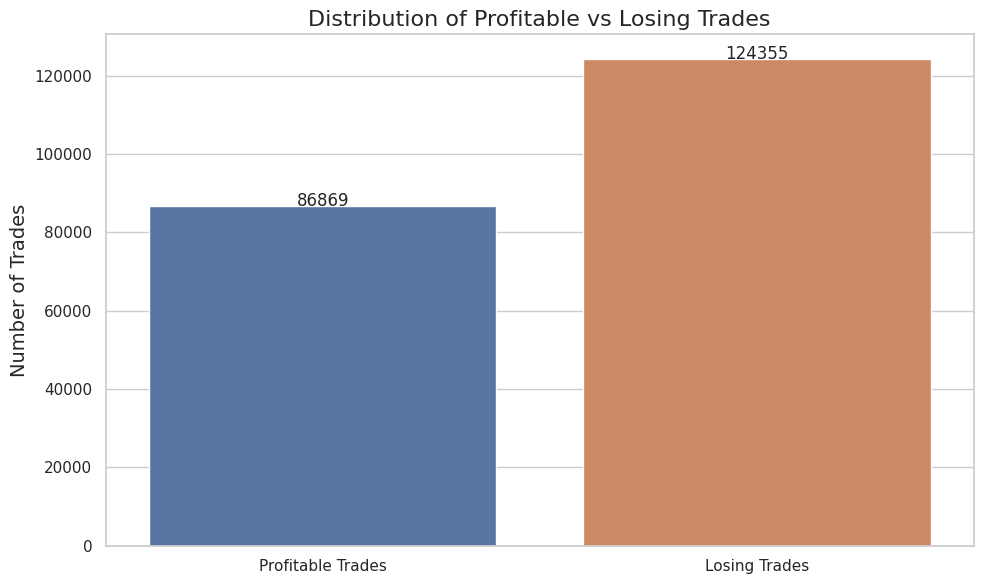

In [10]:
# Distribution of profitable vs losing trades
trade_results = ['Profitable Trades', 'Losing Trades']
trade_counts = [overall_metrics['profitable_trades'], overall_metrics['losing_trades']]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=trade_results, y=trade_counts)
plt.title('Distribution of Profitable vs Losing Trades', fontsize=16)
plt.ylabel('Number of Trades', fontsize=14)

# Add value labels
for i, v in enumerate(trade_counts):
    ax.text(i, v + 5, str(v), ha='center')

plt.tight_layout()


## 4. Sentiment Distribution Analysis

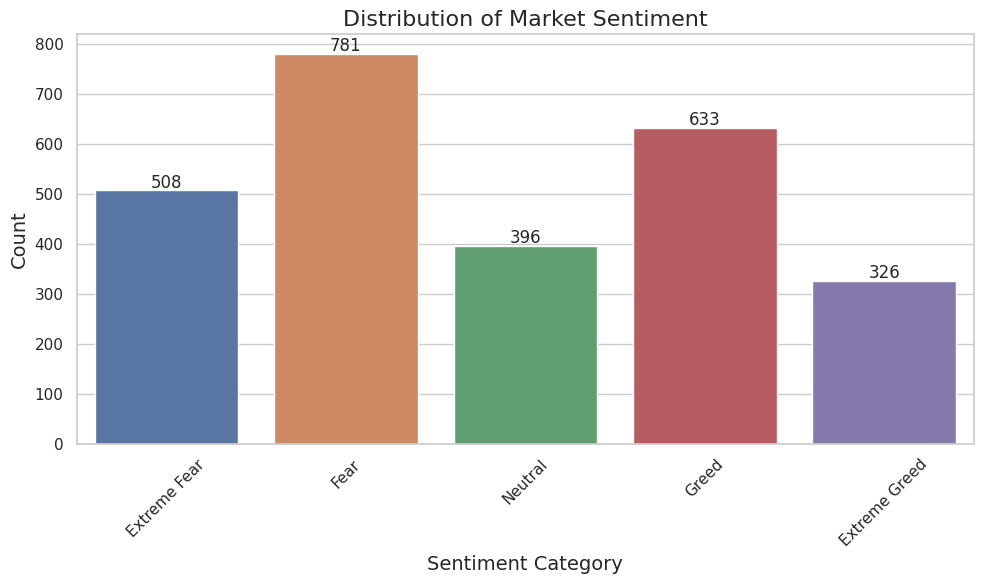

In [11]:
plot_sentiment_distribution(sentiment_data)

In [12]:
# Analyze sentiment transitions
transition_matrix = calculate_sentiment_transition_matrix(sentiment_data)
transition_matrix


next_sentiment,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
classification,,,,,
Extreme Fear,0.818898,0.000000,0.173228,0.000000,0.007874
Extreme Greed,0.000000,0.831288,0.006135,0.159509,0.003067
Fear,0.112676,0.001280,0.781050,0.015365,0.089629
Greed,0.001582,0.085443,0.018987,0.787975,0.106013
Neutral,0.007576,0.000000,0.171717,0.179293,0.641414


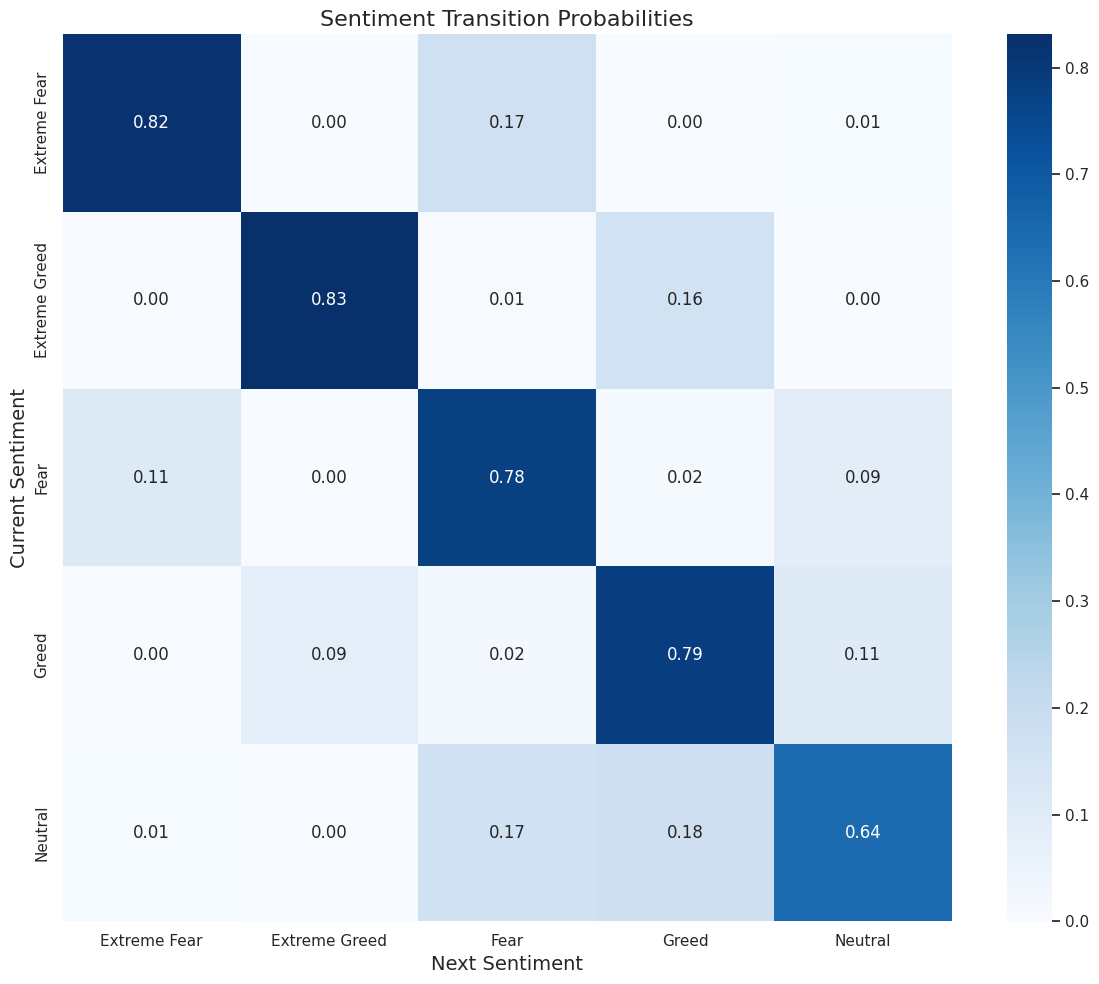

In [13]:
# Visualize sentiment transitions as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(transition_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Sentiment Transition Probabilities', fontsize=16)
plt.xlabel('Next Sentiment', fontsize=14)
plt.ylabel('Current Sentiment', fontsize=14)
plt.tight_layout()


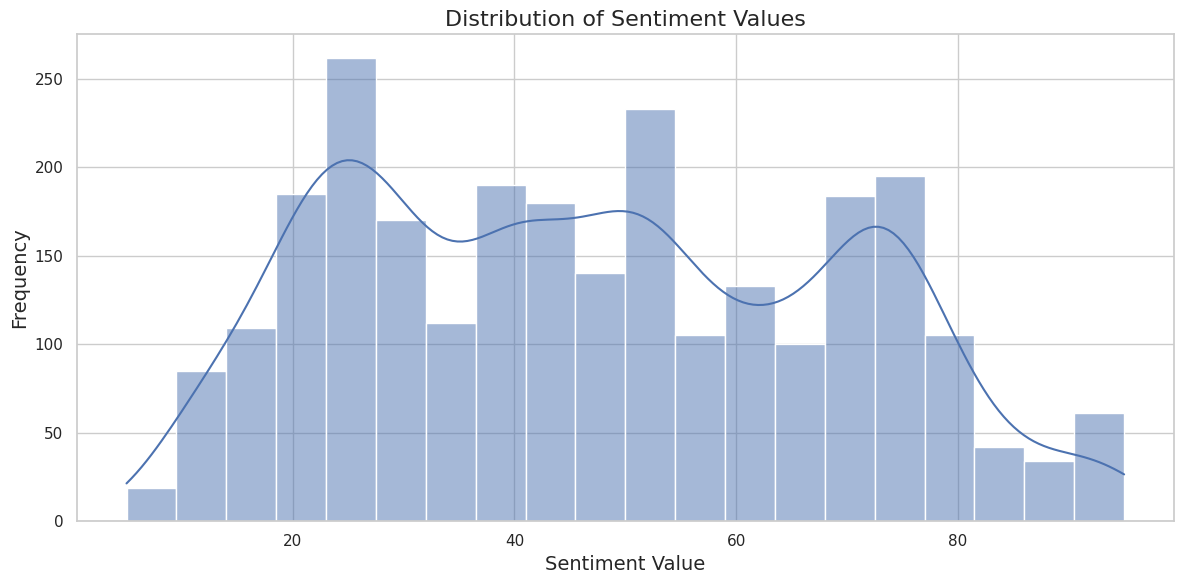

In [14]:
# Sentiment value distribution
plt.figure(figsize=(12, 6))
sns.histplot(sentiment_data['value'], bins=20, kde=True)
plt.title('Distribution of Sentiment Values', fontsize=16)
plt.xlabel('Sentiment Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()


## 5. Trading Performance by Sentiment

In [15]:
# Analyze performance metrics by sentiment category
sentiment_performance = analyze_sentiment_performance(merged_data)
sentiment_performance


,total_trades,profitable_trades,losing_trades,win_rate,total_profit,avg_profit_per_trade,max_profit,max_loss,profit_factor
Extreme Greed,39992.0,18594.0,21398.0,0.464943,2.715171e+06,67.892861,44223.45187,-10259.46800,11.022783
Extreme Fear,21400.0,7931.0,13469.0,0.370607,7.391102e+05,34.537862,115287.00000,-31036.69194,2.161536
Fear,61837.0,26019.0,35818.0,0.420768,3.357155e+06,54.290400,135329.09010,-35681.74723,6.655644
Greed,50309.0,19364.0,30945.0,0.384901,2.192601e+06,43.582684,74530.52371,-117990.10410,3.071059
Neutral,37686.0,14961.0,22725.0,0.396991,1.292921e+06,34.307718,48504.09555,-24500.00000,4.321265


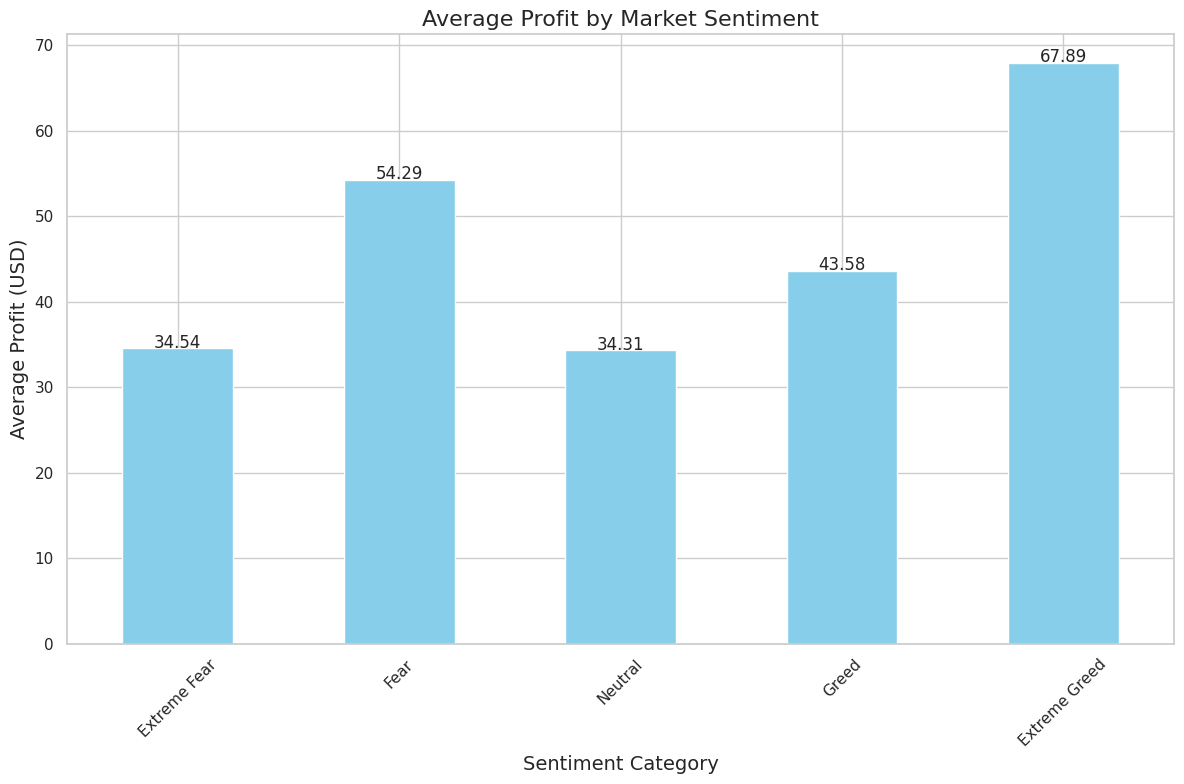

In [16]:
plot_profit_by_sentiment(merged_data)

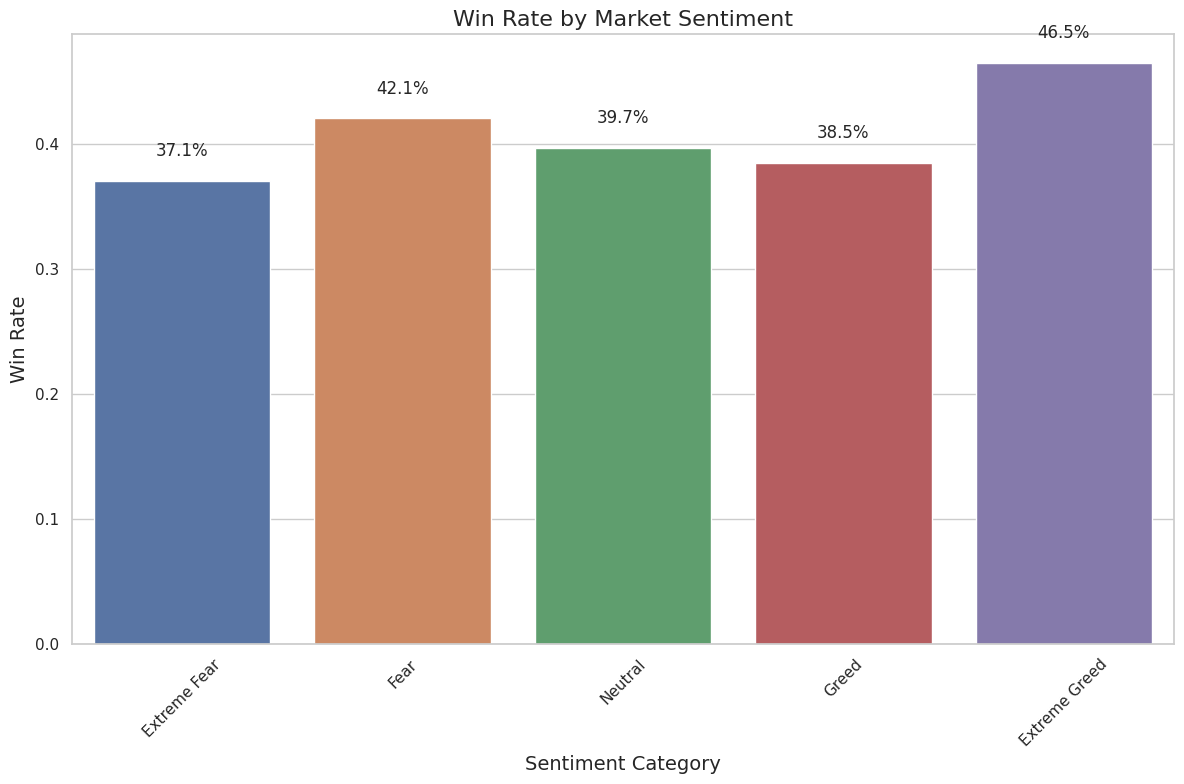

In [17]:
plot_win_rate_by_sentiment(merged_data)

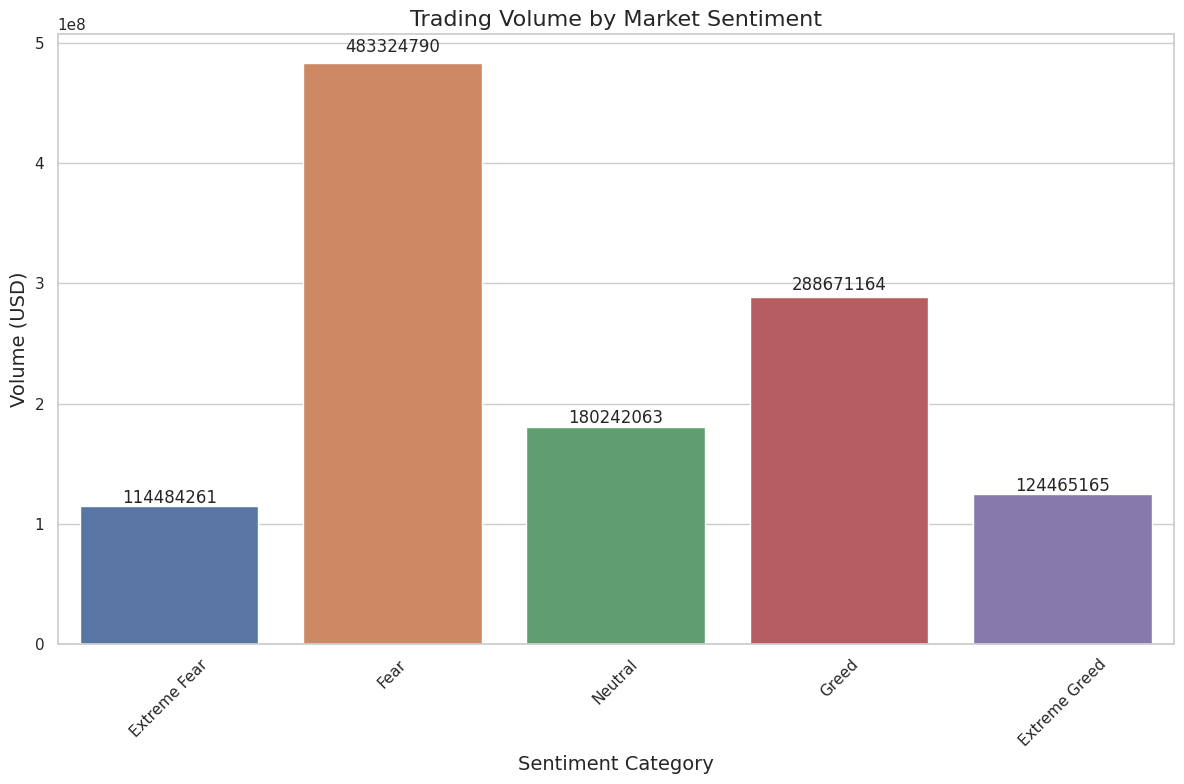

In [18]:
plot_trading_volume_by_sentiment(merged_data)

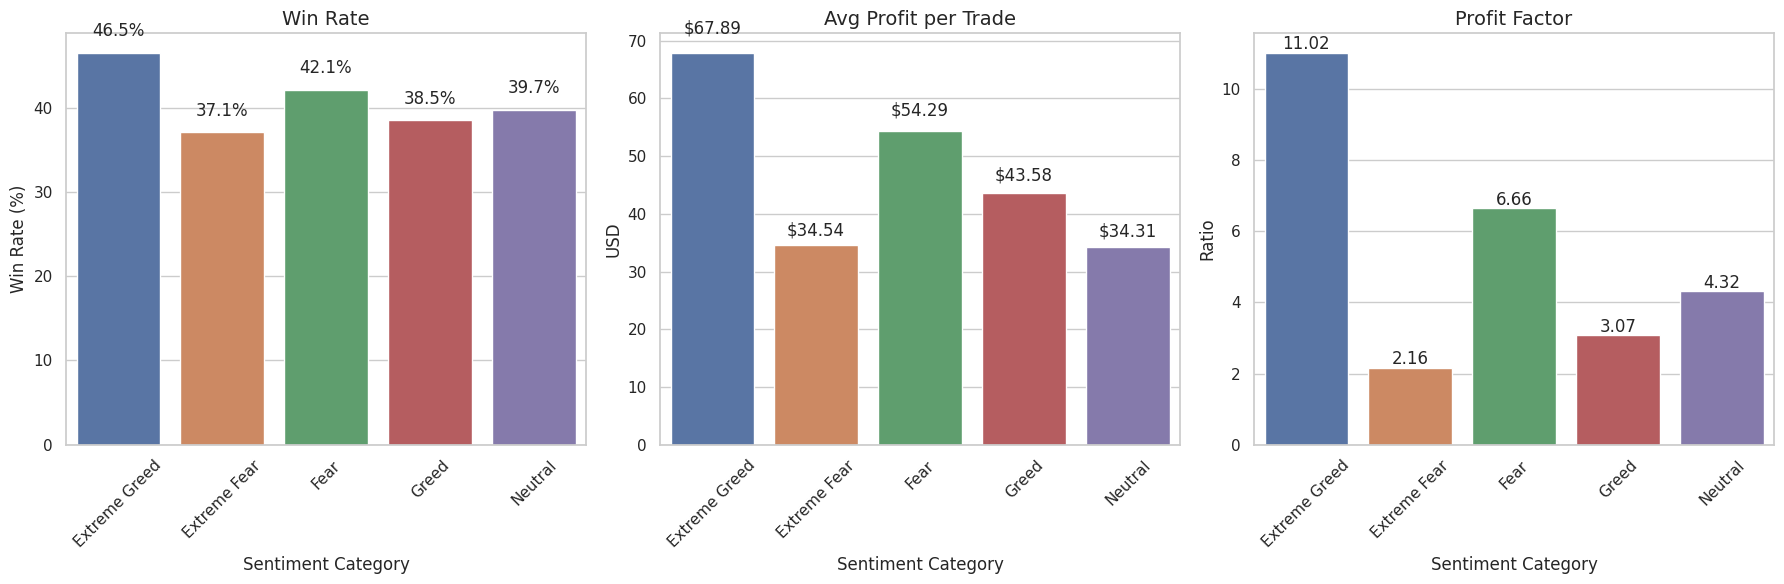

In [19]:
# Compare key metrics across sentiment categories

# Extract metrics we want to compare
metrics_to_compare = ['win_rate', 'avg_profit_per_trade', 'profit_factor']
metrics_labels = ['Win Rate', 'Avg Profit per Trade', 'Profit Factor']

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (metric, label) in enumerate(zip(metrics_to_compare, metrics_labels)):
    data = sentiment_performance[metric]
    
    # Format data for win rate
    if metric == 'win_rate':
        data = data * 100  # Convert to percentage
        y_label = 'Win Rate (%)'
    elif metric == 'avg_profit_per_trade':
        y_label = 'USD'
    else:
        y_label = 'Ratio'
    
    # Create bar plot
    sns.barplot(x=data.index, y=data.values, ax=axes[i])
    
    # Customize plot
    axes[i].set_title(label, fontsize=14)
    axes[i].set_ylabel(y_label, fontsize=12)
    axes[i].set_xlabel('Sentiment Category', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels
    for j, v in enumerate(data):
        if metric == 'win_rate':
            axes[i].text(j, v + 2, f"{v:.1f}%", ha='center')
        elif metric == 'profit_factor':
            axes[i].text(j, v + 0.1, f"{v:.2f}", ha='center')
        else:
            axes[i].text(j, v + (abs(v) * 0.05), f"${v:.2f}", ha='center')

plt.tight_layout()


## 6. Sentiment Time Series Analysis

<Figure size 1600x1200 with 0 Axes>

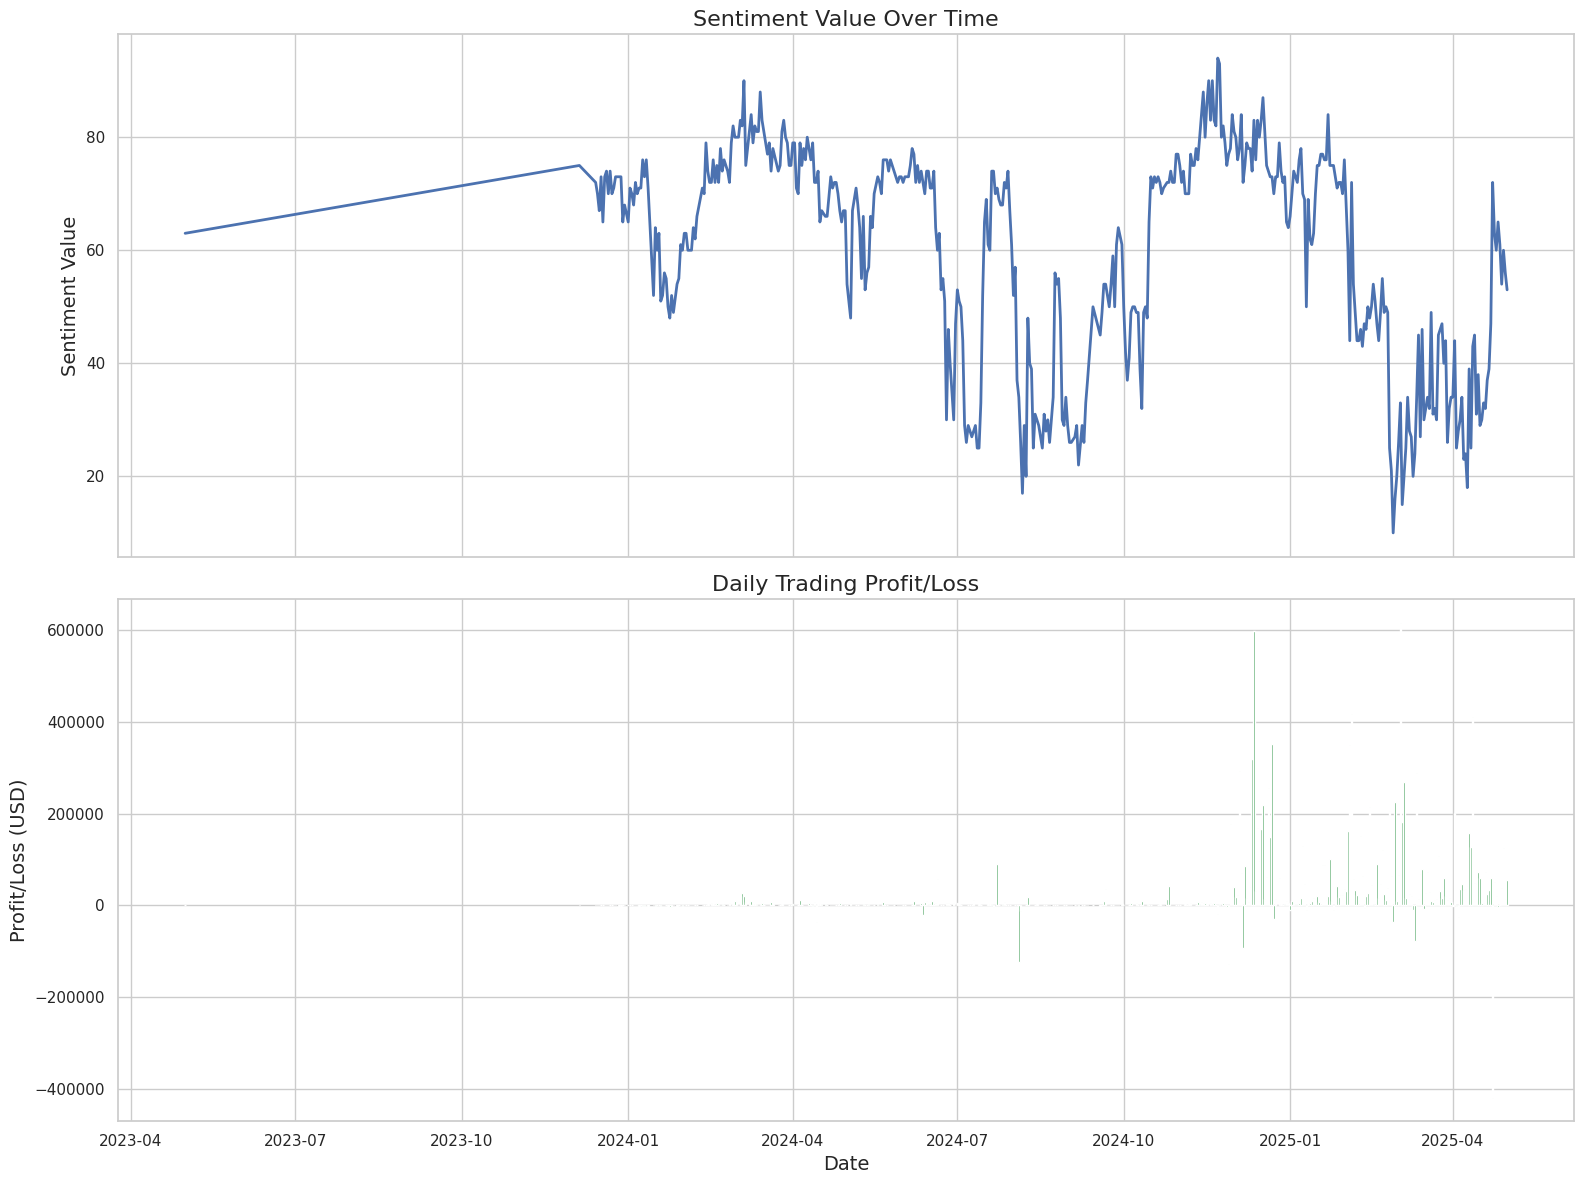

In [20]:
plot_sentiment_value_time_series(merged_data)

In [21]:
# Calculate daily sentiment and performance metrics
daily_metrics = merged_data.groupby('Date').agg({
    'value': 'mean',
    'Closed PnL': 'sum',
    'Size USD': 'sum',
    'Closed PnL': ['sum', 'mean', 'count'],
}).reset_index()

daily_metrics.columns = ['Date', 'Sentiment_Value', 'Total_PnL', 'Total_Volume', 'Avg_PnL', 'Trade_Count']
daily_metrics.head()


,Date,Sentiment_Value,Total_PnL,Total_Volume,Avg_PnL,Trade_Count
0,2023-05-01,63.0,0.000000,0.000000,3,477.00
1,2023-12-05,75.0,0.000000,0.000000,9,50005.83
2,2023-12-14,72.0,-205.434737,-18.675885,11,113203.35
3,2023-12-15,70.0,-24.632034,-12.316017,2,10609.95
4,2023-12-16,67.0,0.000000,0.000000,3,15348.77


<Figure size 1400x1000 with 0 Axes>

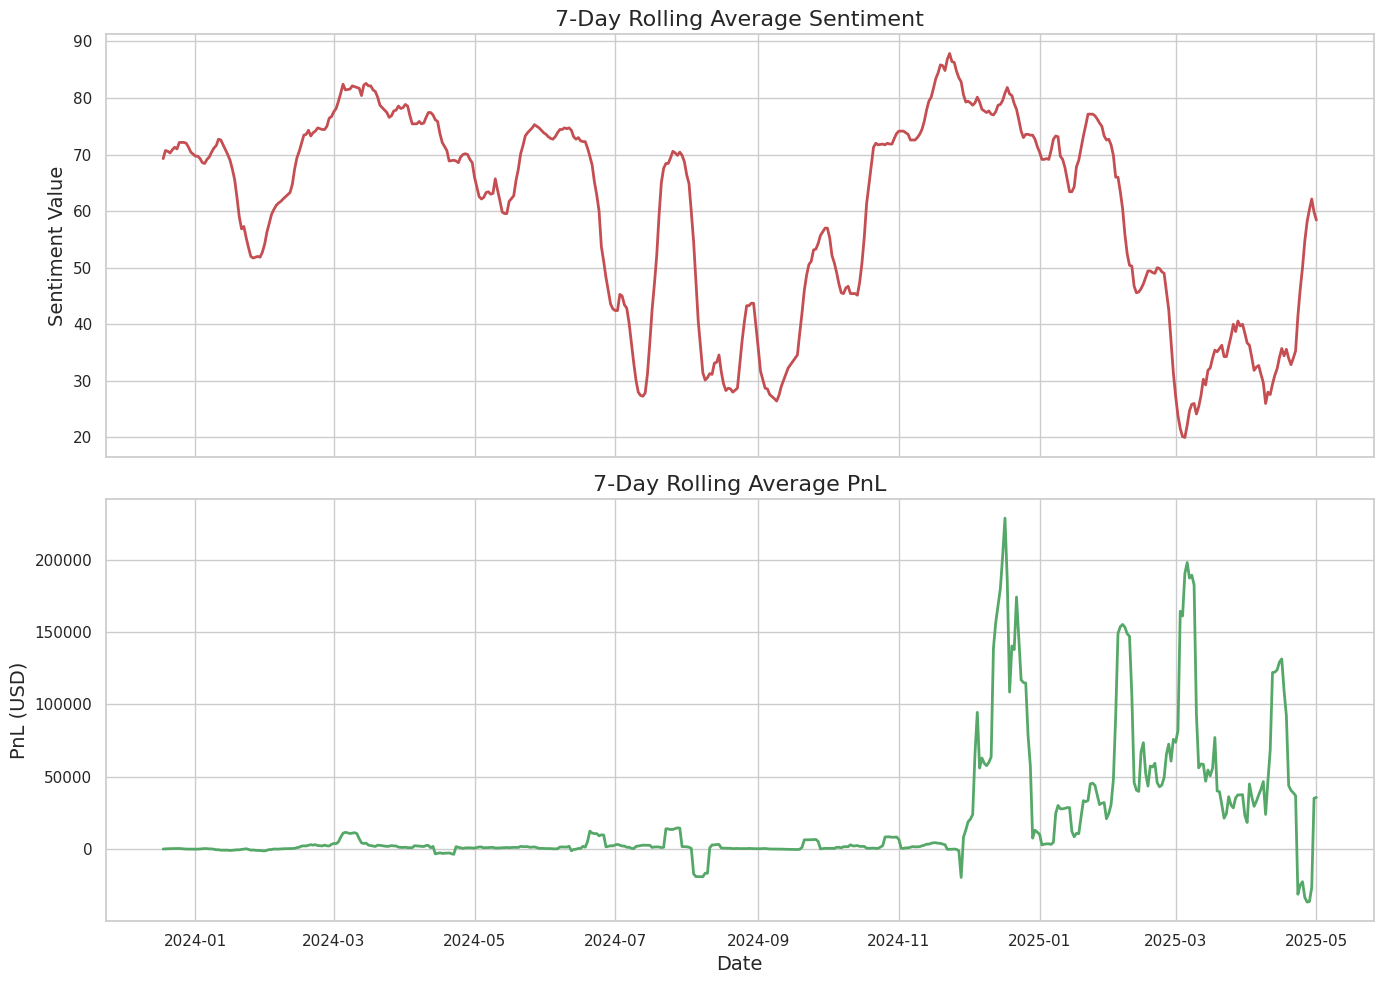

In [22]:
# Calculate rolling metrics
window_size = 7  # 7-day moving average

# Sort by date first
daily_metrics = daily_metrics.sort_values('Date')

# Calculate rolling metrics
daily_metrics['Rolling_Sentiment'] = daily_metrics['Sentiment_Value'].rolling(window=window_size).mean()
daily_metrics['Rolling_PnL'] = daily_metrics['Total_PnL'].rolling(window=window_size).mean()

# Plot rolling sentiment vs rolling PnL
plt.figure(figsize=(14, 10))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot rolling sentiment
ax1.plot(daily_metrics['Date'], daily_metrics['Rolling_Sentiment'], 'r-', linewidth=2)
ax1.set_title(f'{window_size}-Day Rolling Average Sentiment', fontsize=16)
ax1.set_ylabel('Sentiment Value', fontsize=14)
ax1.grid(True)

# Plot rolling PnL
ax2.plot(daily_metrics['Date'], daily_metrics['Rolling_PnL'], 'g-', linewidth=2)
ax2.set_title(f'{window_size}-Day Rolling Average PnL', fontsize=16)
ax2.set_xlabel('Date', fontsize=14)
ax2.set_ylabel('PnL (USD)', fontsize=14)
ax2.grid(True)

plt.tight_layout()


## 7. Trading Strategy Analysis by Sentiment

In [23]:
# Analyze trading side (buy/sell) distribution by sentiment
side_sentiment, side_sentiment_pct = analyze_side_by_sentiment(merged_data)

# Display absolute counts
print("Trading Side by Sentiment (Counts):")
side_sentiment


Trading Side by Sentiment (Counts):


Side,BUY,SELL
classification,,
Extreme Fear,10935,10465
Extreme Greed,17940,22052
Fear,30270,31567
Greed,24582,25727
Neutral,18969,18717


In [24]:
# Display percentages
print("Trading Side by Sentiment (Percentages):")
side_sentiment_pct


Trading Side by Sentiment (Percentages):


Side,BUY,SELL
classification,,
Extreme Fear,0.510981,0.489019
Extreme Greed,0.448590,0.551410
Fear,0.489513,0.510487
Greed,0.488620,0.511380
Neutral,0.503343,0.496657


<Figure size 1200x800 with 0 Axes>

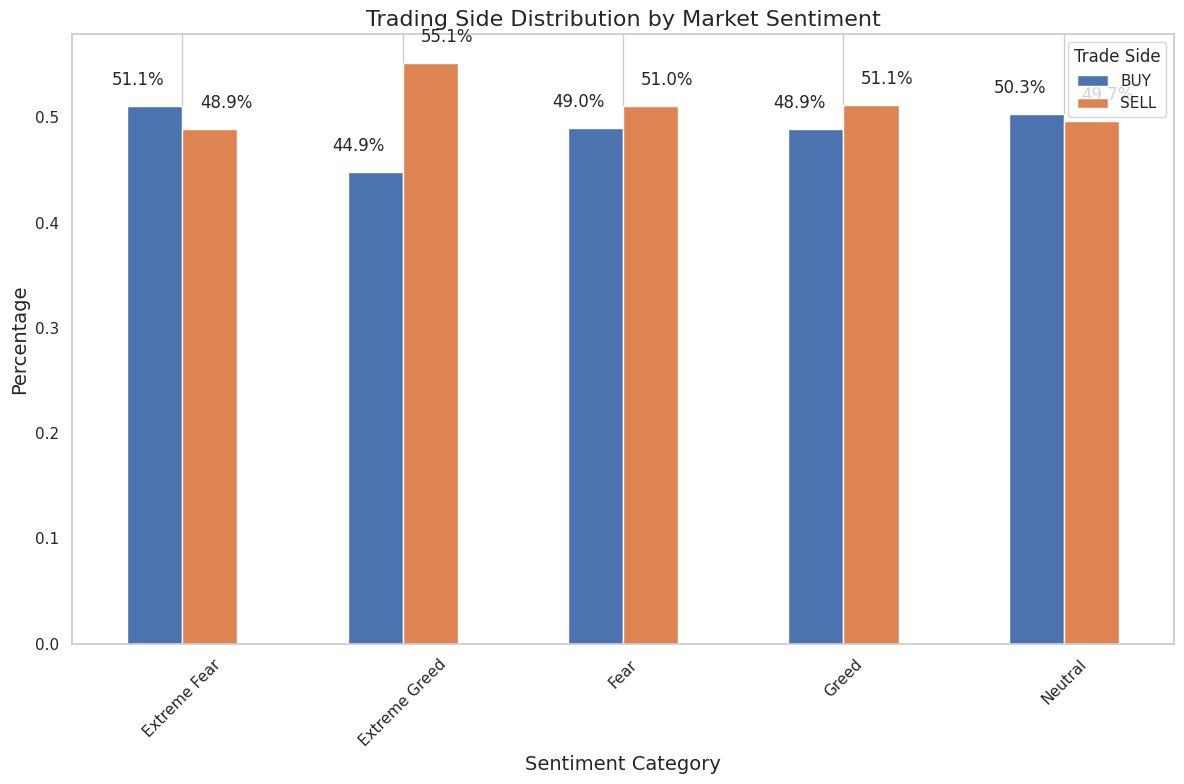

In [25]:
# Visualize trading side distribution by sentiment
plt.figure(figsize=(12, 8))

# Plot data
side_sentiment_pct.plot(kind='bar', stacked=False)

plt.title('Trading Side Distribution by Market Sentiment', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Trade Side')
plt.grid(axis='y')

# Add percentage labels
for i, sentiment in enumerate(side_sentiment_pct.index):
    for j, side in enumerate(side_sentiment_pct.columns):
        value = side_sentiment_pct.loc[sentiment, side]
        plt.text(i + (j-0.5)*0.4, value + 0.02, f"{value:.1%}", ha='center')

plt.tight_layout()


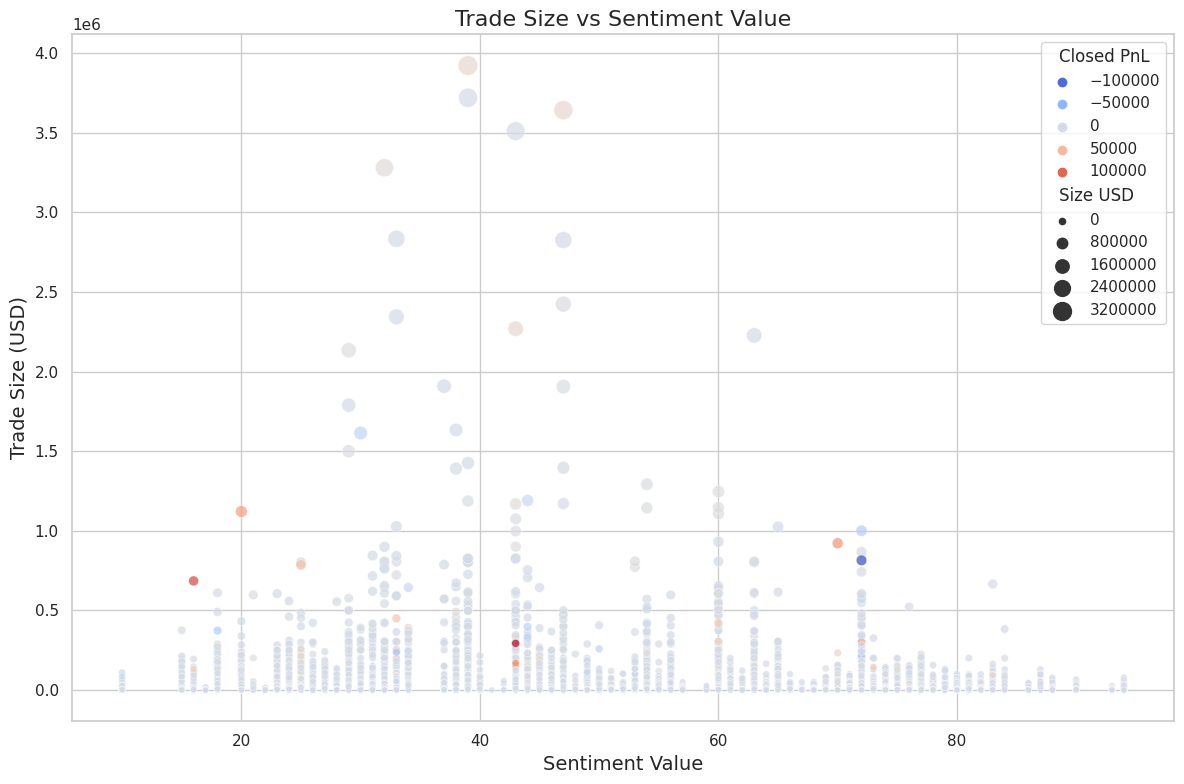

In [26]:
# Plot trade size vs sentiment
plot_trade_size_vs_sentiment(merged_data)


## 8. Correlation Analysis

In [27]:
# Calculate correlation between sentiment and trading metrics
correlations = calculate_sentiment_correlation(merged_data)
correlations


,Closed PnL,Size USD,value,Side
Closed PnL,1.000000,0.325447,-0.082209,-0.065187
Size USD,0.325447,1.000000,-0.264727,-0.014666
value,-0.082209,-0.264727,1.000000,-0.046782
Side,-0.065187,-0.014666,-0.046782,1.000000


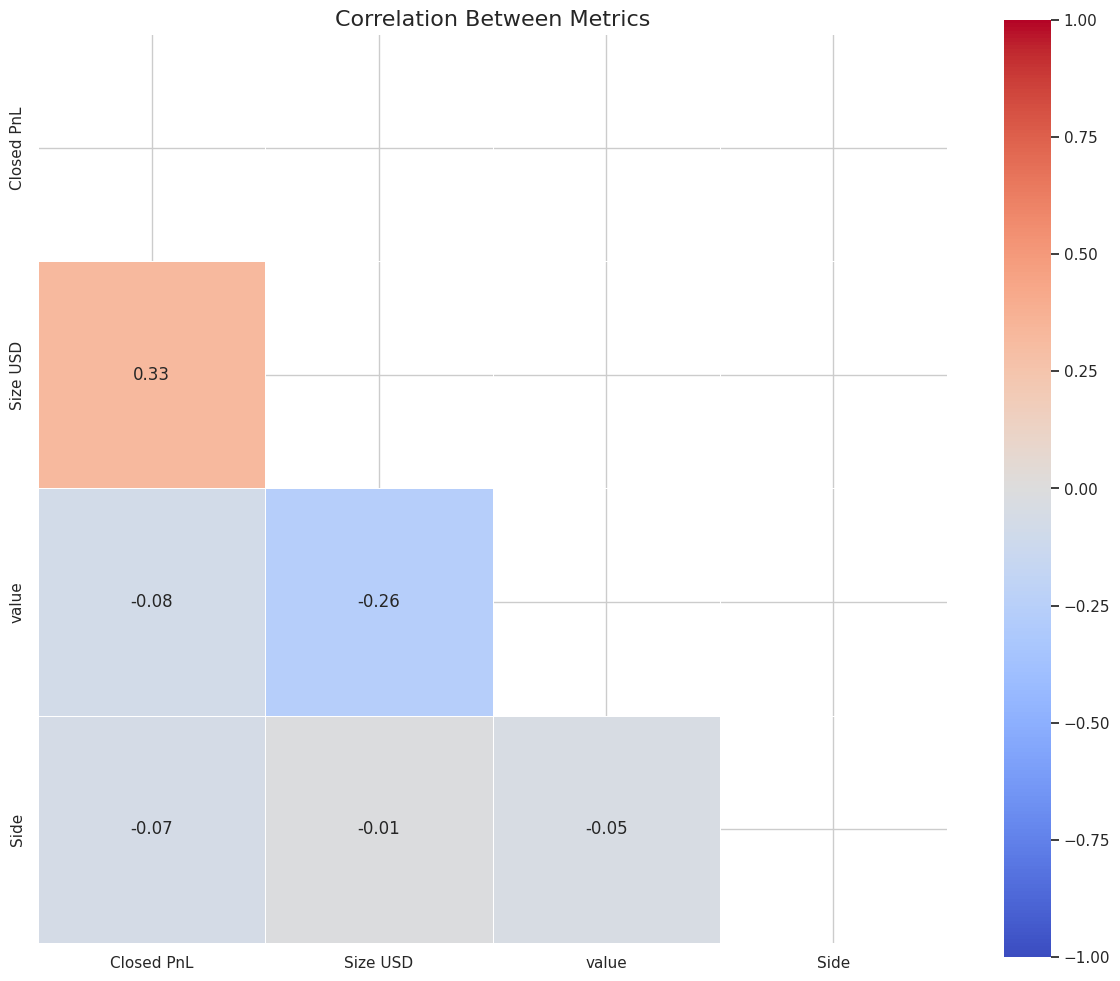

In [28]:
# Plot correlation heatmap
plot_heatmap_correlation(correlations)


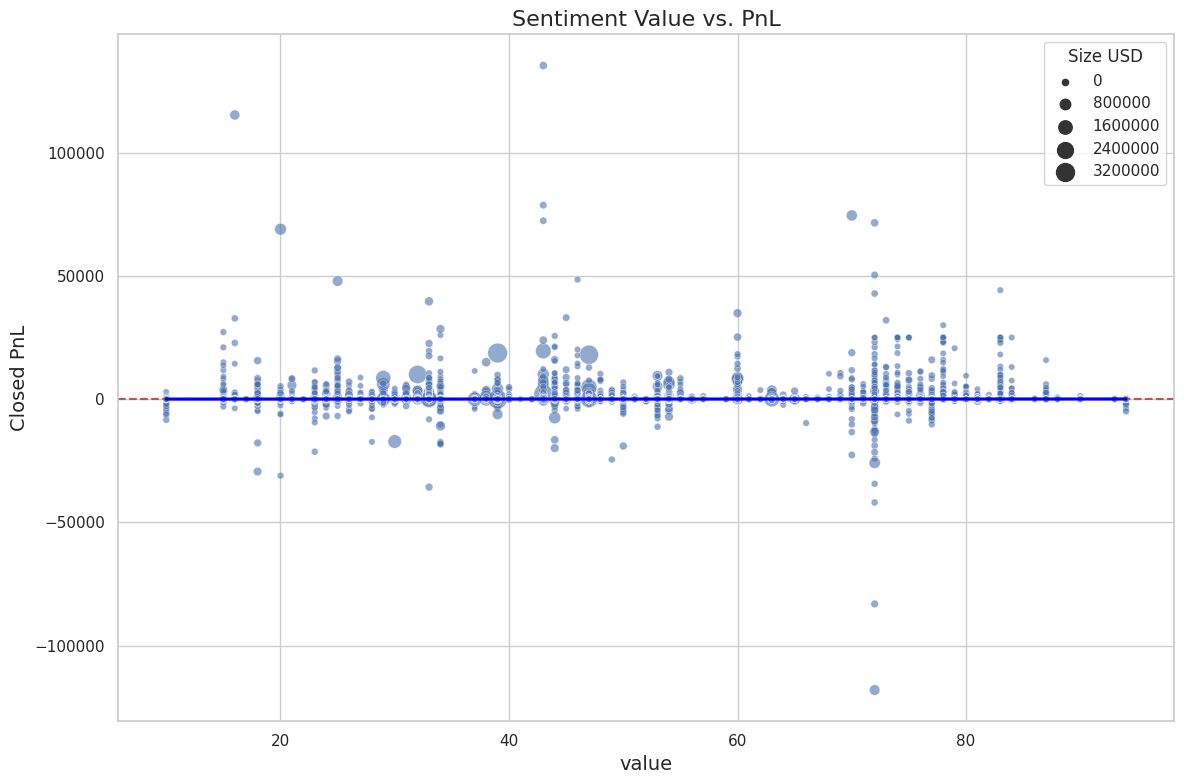

In [29]:
# Scatter plot of sentiment value vs PnL
plt.figure(figsize=(12, 8))
sns.scatterplot(x='value', y='Closed PnL', data=merged_data, alpha=0.6, size='Size USD', sizes=(20, 200))
plt.title('Sentiment Value vs. PnL', fontsize=16)
plt.xlabel('Sentiment Value', fontsize=14)
plt.ylabel('Profit/Loss (USD)', fontsize=14)
plt.axhline(y=0, color='r', linestyle='--')

# Add trend line
sns.regplot(x='value', y='Closed PnL', data=merged_data, scatter=False, color='blue')

plt.tight_layout()


## 9. Performance by Account

In [30]:
# Calculate performance metrics by account
account_performance = calculate_performance_by_account(historical_data)
account_performance


,total_trades,profitable_trades,losing_trades,win_rate,total_profit,avg_profit_per_trade,max_profit,max_loss,profit_factor
0xae5eacaf9c6b9111fd53034a602c192a04e082ed,563.0,230.0,333.0,0.408526,6.784562e+04,120.507317,7047.857251,0.000000,inf
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,1430.0,438.0,992.0,0.306294,4.030115e+05,281.826227,27223.741500,-3968.952250,1.027450e+01
0x513b8629fe877bb581bf244e326a047b249c4ff1,12236.0,4909.0,7327.0,0.401193,8.404226e+05,68.684419,19530.522500,-29370.119800,5.902045e+00
0x083384f897ee0f19899168e3b1bec365f52a9012,3818.0,1373.0,2445.0,0.359612,1.600230e+06,419.127768,135329.090100,-117990.104100,4.708739e+00
0x430f09841d65beb3f27765503d0f850b8bce7713,1237.0,599.0,638.0,0.484236,4.165419e+05,336.735548,29999.906250,0.000000,inf
0x8381e6d82f1affd39a336e143e081ef7620a3b7f,1911.0,631.0,1280.0,0.330194,6.551366e+04,34.282396,8424.257062,-1457.734900,1.264143e+01
0x4f93fead39b70a1824f981a54d4e55b278e9f760,7584.0,2733.0,4851.0,0.360364,3.089759e+05,40.740489,8098.268730,-21524.400000,2.432099e+00
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,9893.0,8022.0,1871.0,0.810876,3.790954e+05,38.319560,5949.806984,-5843.040000,8.604447e+00
0x420ab45e0bd8863569a5efbb9c05d91f40624641,383.0,90.0,293.0,0.234987,1.995056e+05,520.902331,25997.375000,0.000000,inf
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,14733.0,4967.0,9766.0,0.337134,2.143383e+06,145.481748,48504.095550,-5028.066368,3.609562e+01


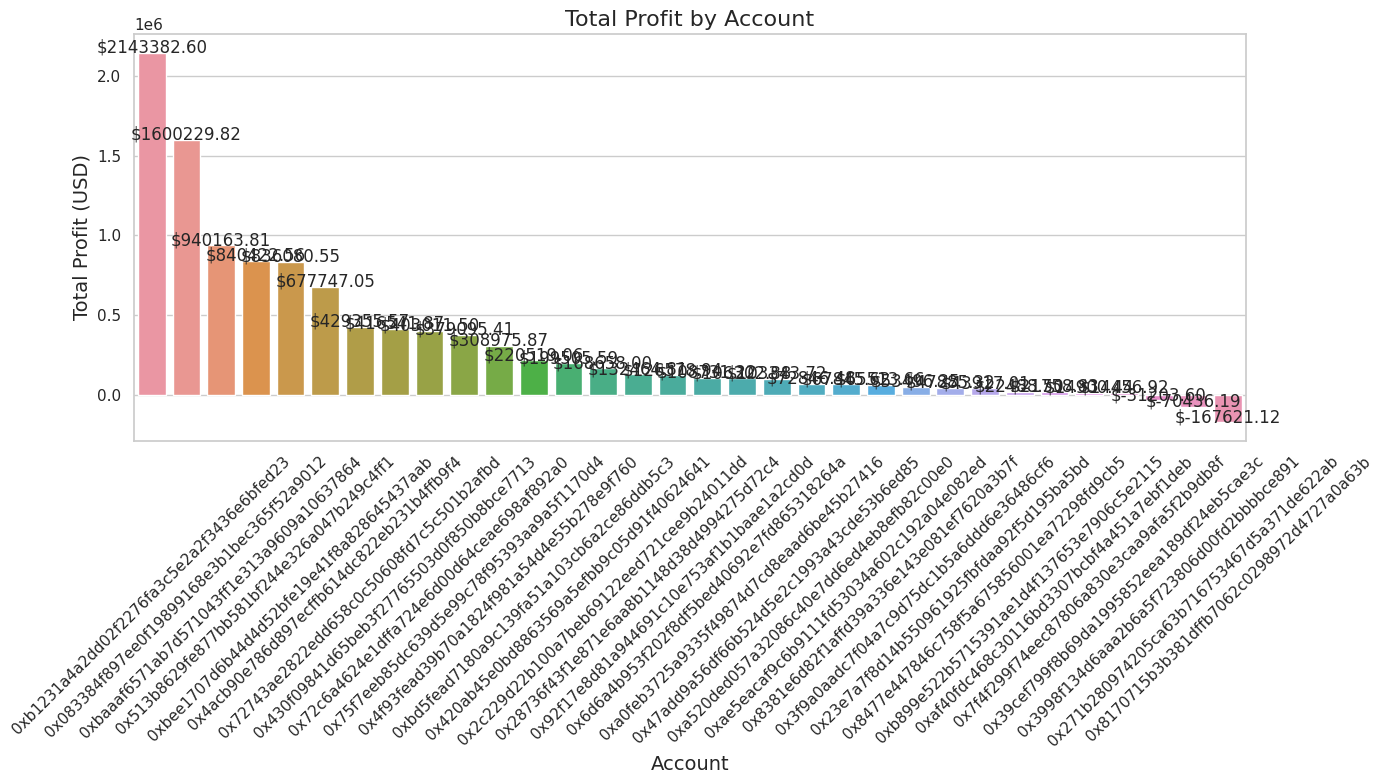

In [31]:
# Visualize account performance
plt.figure(figsize=(14, 8))

# Plot total profit by account
sorted_accounts = account_performance.sort_values('total_profit', ascending=False)
ax = sns.barplot(x=sorted_accounts.index, y=sorted_accounts['total_profit'])

plt.title('Total Profit by Account', fontsize=16)
plt.xlabel('Account', fontsize=14)
plt.ylabel('Total Profit (USD)', fontsize=14)
plt.xticks(rotation=45)

# Add value labels
for i, v in enumerate(sorted_accounts['total_profit']):
    ax.text(i, v + (5 if v >= 0 else -5), f"${v:.2f}", ha='center')

plt.tight_layout()


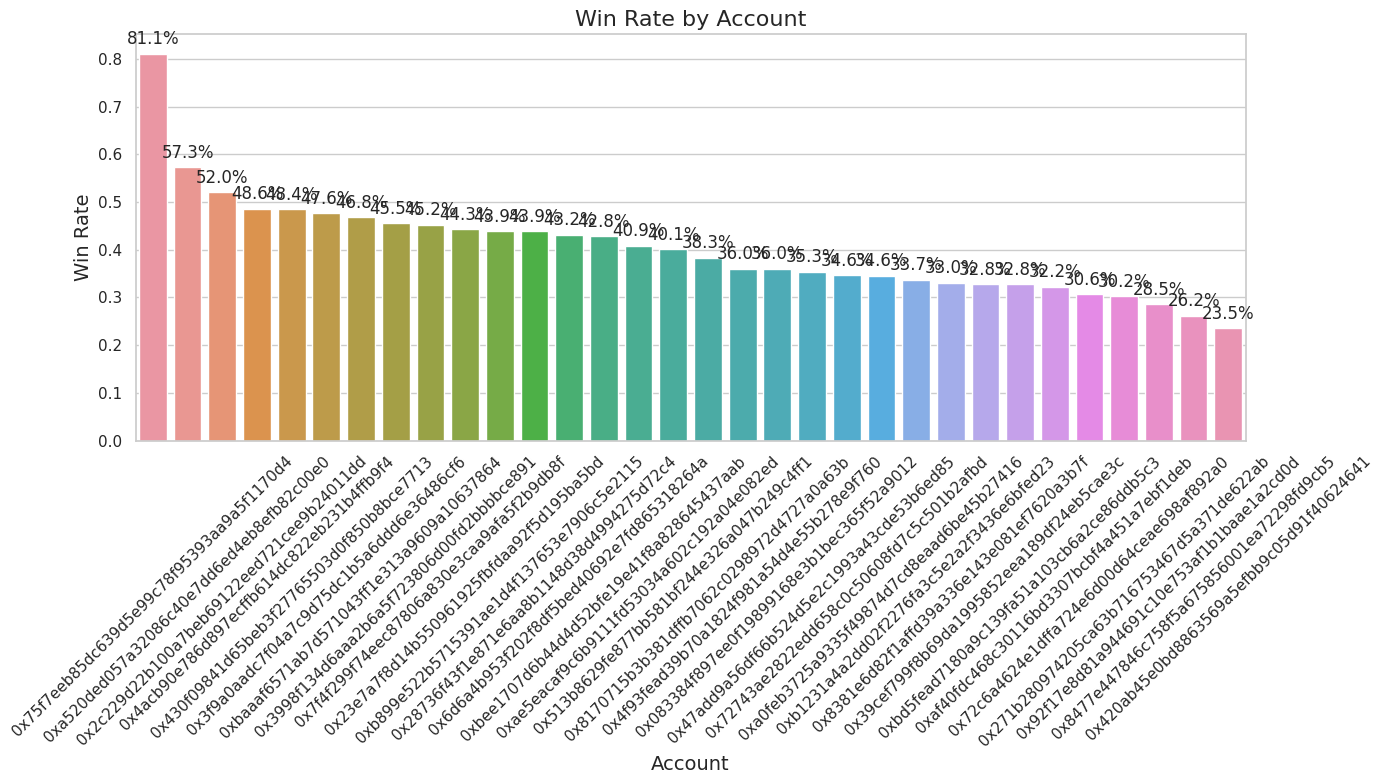

In [32]:
# Compare win rates across accounts
plt.figure(figsize=(14, 8))

# Sort by win rate
sorted_by_winrate = account_performance.sort_values('win_rate', ascending=False)
ax = sns.barplot(x=sorted_by_winrate.index, y=sorted_by_winrate['win_rate'])

plt.title('Win Rate by Account', fontsize=16)
plt.xlabel('Account', fontsize=14)
plt.ylabel('Win Rate', fontsize=14)
plt.xticks(rotation=45)

# Add percentage labels
for i, v in enumerate(sorted_by_winrate['win_rate']):
    ax.text(i, v + 0.02, f"{v:.1%}", ha='center')

plt.tight_layout()


## 10. Advanced Analysis: Sentiment as a Trading Signal

In [34]:
# Analyze sentiment value thresholds for potential signals
sentiment_thresholds = np.arange(10, 90, 10)  # Thresholds from 10 to 80 in steps of 10

threshold_results = []

for lower_threshold in sentiment_thresholds:
    for upper_threshold in sentiment_thresholds:
        if lower_threshold < upper_threshold:
            # Define trading strategy:
            # - BUY when sentiment is below lower_threshold (fear)
            # - SELL when sentiment is above upper_threshold (greed)
            
            # Filter trades
            buy_on_fear = merged_data[(merged_data['value'] <= lower_threshold) & 
                                    (merged_data['Side'] == 'BUY')]
            
            sell_on_greed = merged_data[(merged_data['value'] >= upper_threshold) & 
                                       (merged_data['Side'] == 'SELL')]
            
            # Combined strategy trades
            strategy_trades = pd.concat([buy_on_fear, sell_on_greed])
            
            # Skip if no trades
            if len(strategy_trades) < 10:  # Require at least 10 trades
                continue
            
            # Calculate metrics
            metrics = calculate_trading_metrics(strategy_trades)
            
            # Save results
            threshold_results.append({
                'lower_threshold': lower_threshold,
                'upper_threshold': upper_threshold,
                'trade_count': metrics['total_trades'],
                'win_rate': metrics['win_rate'],
                'avg_profit': metrics['avg_profit_per_trade'],
                'total_profit': metrics['total_profit'],
                'profit_factor': metrics['profit_factor']
            })

# Convert to DataFrame
threshold_df = pd.DataFrame(threshold_results)

# Display top 5 strategies by profit factor
threshold_df.sort_values('profit_factor', ascending=False).head(5)


,lower_threshold,upper_threshold,trade_count,win_rate,avg_profit,total_profit,profit_factor
6,10,80,9943,0.618023,156.645082,1.557522e+06,136.454344
5,10,70,38313,0.528202,94.549616,3.622479e+06,16.883541
4,10,60,46602,0.507704,84.845202,3.953956e+06,15.921218
3,10,50,52870,0.522016,80.263823,4.243548e+06,12.417358
2,10,40,72691,0.529130,71.041567,5.164083e+06,10.193674


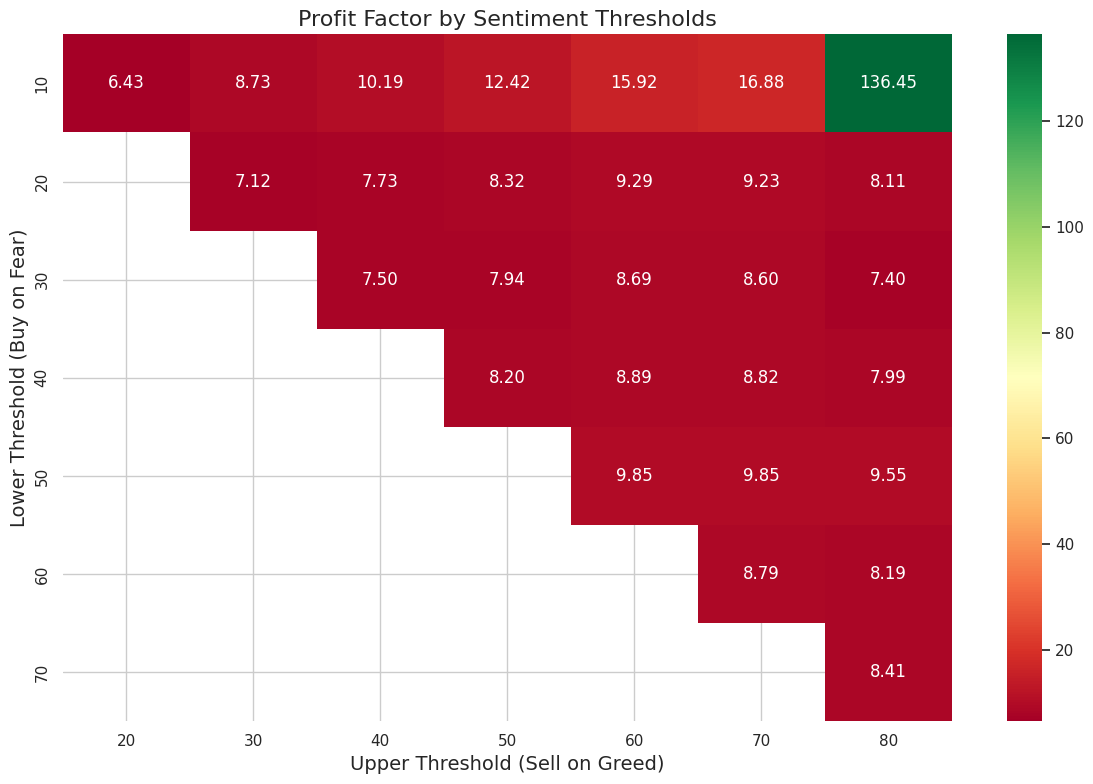

In [35]:
# Visualize optimal thresholds
plt.figure(figsize=(12, 8))

# Create pivot table for heatmap
pivot_data = threshold_df.pivot_table(
    index='lower_threshold', 
    columns='upper_threshold', 
    values='profit_factor',
    aggfunc='mean'
)

# Create heatmap
sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='RdYlGn')
plt.title('Profit Factor by Sentiment Thresholds', fontsize=16)
plt.xlabel('Upper Threshold (Sell on Greed)', fontsize=14)
plt.ylabel('Lower Threshold (Buy on Fear)', fontsize=14)

plt.tight_layout()


## 11. Summary & Conclusions

### Key Findings:
Overall Trading Performance:

    Total number of trades analyzed

    Overall win rate and profitability metrics

    Distribution of profitable vs losing trades

Sentiment Distribution:

    Most common market sentiment categories observed

    Sentiment transition probabilities

    Sentiment value distribution over time

Performance by Sentiment:

    Best performing sentiment categories in terms of win rate

    Most profitable sentiment categories

    Trading volume differences across sentiment categories

Correlation Analysis:

    Relationship between sentiment value and trading metrics

    Strength and direction of correlations

Account Performance:

    Performance variations across different trading accounts

    Accounts with highest win rates and profitability

Sentiment Trading Signals:

    Optimal sentiment thresholds for potential trading signals

    Performance of buy-on-fear, sell-on-greed strategies